# Introduction to CountVectorizer and Bag of Words Model

In this task, you will learn the basics of text representation using the Bag of Words model with CountVectorizer. The objective is to convert the text data into a format that can be used in machine learning algorithms.

In [3]:
## 1.1 Import the necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
## 1.2 Load the dataset
newsgroups_data = fetch_20newsgroups(subset='train')
data = newsgroups_data['data']


Use CountVectorizer from sklearn to transform the text data into numerical vectors. To do that, you have to learn how the parameters of CountVectorizer such as max_features, min_df, max_df, and stop_words work, and how they affect the resulting vectors.


In [5]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform the text into numerical values
X = vectorizer.fit_transform(data)

Display the vocabulary (features) that were extracted from the text data.

In [6]:
# Display the vocabulary
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '0000', ..., 'íålittin', 'ñaustin', 'ýé'],
      dtype=object)

# Exploratory Data Analysis of Text Data with Bag of Words Model
In this task, you will perform exploratory data analysis on the vectors created from the text data.

In [7]:
# Import all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import itertools

Investigate the distribution of word counts. Note: As word counts we interpreted the number of times each word appears in the data set. As a sample size for that, we used 100 words

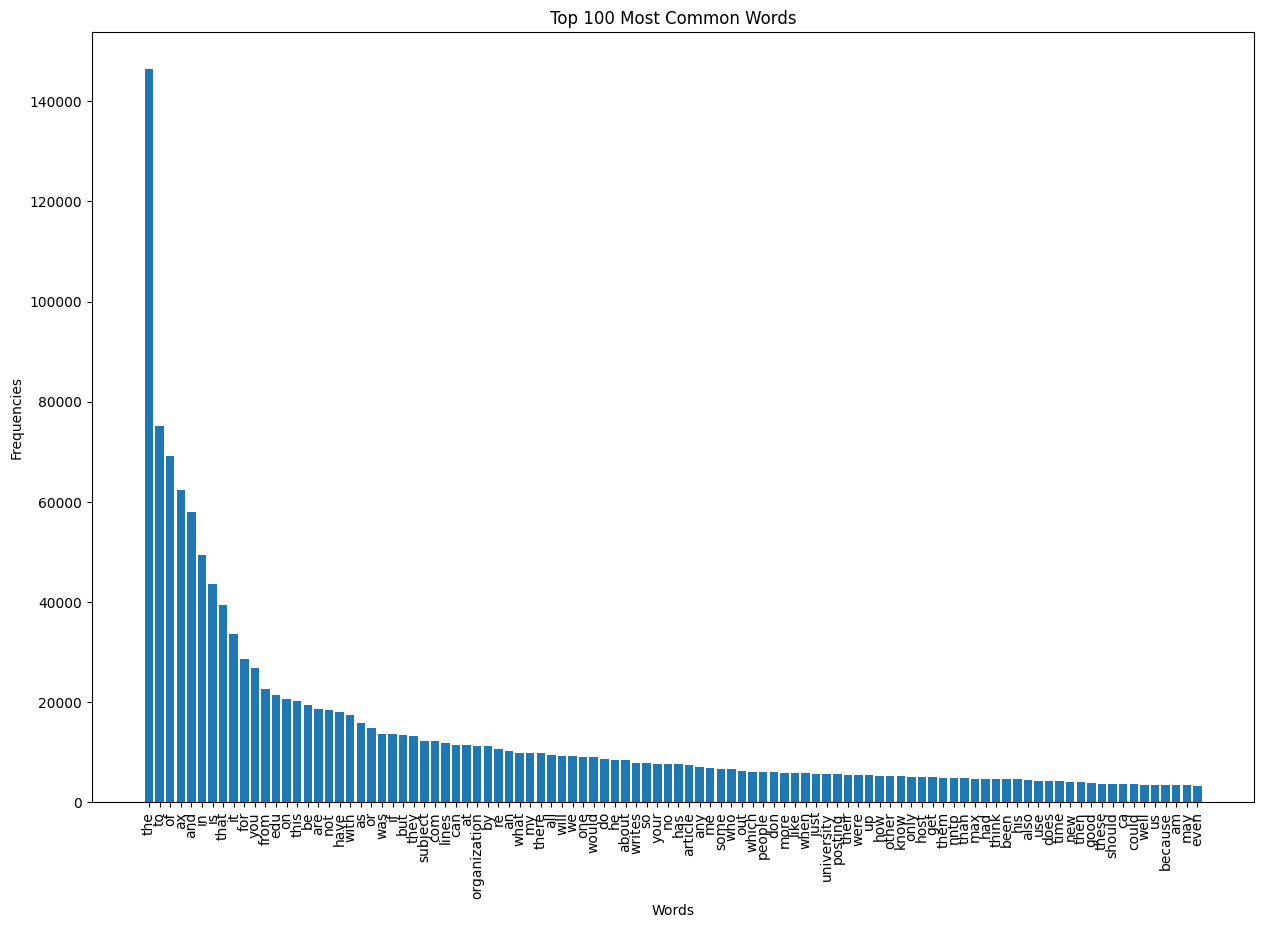

In [8]:
# 1: Get the features and their frequencies 
frequencies = X.sum(axis=0).A1
counts = Counter(dict(zip(feature_names, frequencies)))

# 2: Get the top 100 most common words and their frequencies
top100 = counts.most_common(100)
x1, y1 = zip(*top100)

# 3: Create a bar plot
plt.figure(figsize=(15, 10))
plt.bar(x1, y1)

# 4: Design the bar plot
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 100 Most Common Words')
plt.xticks(rotation = 90)
plt.show()

Identify and discuss any unusual frequent words. For example, in the 20 Newsgroups dataset, the term 'ax' is often found as a high-frequency term, which is actually a part of a sequence of characters ("axaxaxaxax...") that was often included in the quotes and is considered as noise. Besides 'ax' and any other unusual word you might find, exclude the following words: a, an, the, and, it, for, or, but, in, my, your, our, and their.

- In the top 100 words, we found eight words, which are a little odd, considering their frequencies are so high. One of them being 'ax', plus 'edu', 'com', 're', 'don', 'nntp', and 'ca'. The first four are internet domains (even though, com and edu are probably used more frequently than ax and re), but for a meaningful bag of words model, we decided to take them out, since for us, they aren't really meaningful for text representation. nntp most likely means 'Network News Transfer Protocol' and we decided to also take it out. For 'don' and 'ca' we are clueless and definitely decided to take them out. 

Define a list of custom stop words to be ignored by CountVectorizer. This can include the standard English stop words as well as dataset-specific noise (like 'ax' in the 20 Newsgroups dataset).

In [9]:
# Create a list of stop words
stop_words = ['a', 'an', 'the', 'and', 'it', 'for', 'or', 'but', 'in','my', 'your', 'our', 'their', 'ax', 'edu', 'com', 're', 'don', 'nntp', 'ca']

Re-run the CountVectorizer with the custom stop words and create a new Bag of Words model.

In [10]:
# Initialize updated CountVectorizer with stop words
vectorizer2 = CountVectorizer(stop_words = stop_words)

# Transform the new text into numerical values
X2 = vectorizer2.fit_transform(data)

# Extract the new features
feature_names2 = vectorizer2.get_feature_names_out()
feature_names2

array(['00', '000', '0000', ..., 'íålittin', 'ñaustin', 'ýé'],
      dtype=object)

Identify the most and least frequent words in the vocabulary.

In [11]:
# Create a one dimensional array that shows us the word frequencies
frequencies2 = X2.sum(axis=0).A1

# Create a dictionary to store the features and their respective frequencies
common_words = dict(zip(feature_names2, frequencies2))

# Identify the 100 most common words
common = Counter(common_words).most_common(100)
common

[('to', 75064),
 ('of', 69034),
 ('is', 43480),
 ('that', 39264),
 ('you', 26682),
 ('from', 22670),
 ('on', 20491),
 ('this', 20121),
 ('be', 19285),
 ('are', 18616),
 ('not', 18424),
 ('have', 18074),
 ('with', 17325),
 ('as', 15832),
 ('was', 13658),
 ('if', 13642),
 ('they', 13209),
 ('subject', 12264),
 ('lines', 11835),
 ('can', 11355),
 ('at', 11328),
 ('organization', 11233),
 ('by', 11169),
 ('what', 9861),
 ('there', 9689),
 ('all', 9310),
 ('will', 9279),
 ('we', 9227),
 ('one', 9008),
 ('would', 8905),
 ('do', 8674),
 ('he', 8441),
 ('about', 8336),
 ('writes', 7844),
 ('so', 7754),
 ('no', 7594),
 ('has', 7531),
 ('article', 7438),
 ('any', 7016),
 ('me', 6822),
 ('some', 6645),
 ('who', 6581),
 ('out', 6217),
 ('which', 6071),
 ('people', 5975),
 ('more', 5881),
 ('like', 5865),
 ('when', 5701),
 ('just', 5602),
 ('university', 5586),
 ('posting', 5507),
 ('were', 5412),
 ('up', 5322),
 ('how', 5245),
 ('other', 5182),
 ('know', 5128),
 ('only', 5029),
 ('host', 4996),
 (

In [12]:
# 1: Reverse the dictionary of most common words to extract the least common words
uncommon_words = sorted(common_words.items(), key=lambda x: x[1])

# 2: Identify the 100 least common words
uncommon = dict(itertools.islice(uncommon_words, 100))
uncommon

{'000000': 1,
 '0000000667': 1,
 '00000093': 1,
 '000000e5': 1,
 '00000315': 1,
 '00000510200001': 1,
 '000007': 1,
 '00000ee5': 1,
 '000010af': 1,
 '000062david42': 1,
 '000100255pixel': 1,
 '00014': 1,
 '0001mpc': 1,
 '000246': 1,
 '000256': 1,
 '0004': 1,
 '000406': 1,
 '0004136': 1,
 '0004246': 1,
 '00044513': 1,
 '0004847546': 1,
 '0005111312na3em': 1,
 '0005895485': 1,
 '000601': 1,
 '0007': 1,
 '000710': 1,
 '000851': 1,
 '00090711': 1,
 '000956': 1,
 '000ds': 1,
 '000miles': 1,
 '000rpm': 1,
 '000s': 1,
 '001004': 1,
 '001125': 1,
 '0012': 1,
 '001200201pixel': 1,
 '001211': 1,
 '001323': 1,
 '001338': 1,
 '0014': 1,
 '001757': 1,
 '001934': 1,
 '00196': 1,
 '002142': 1,
 '0023': 1,
 '002339': 1,
 '0024': 1,
 '002651': 1,
 '002811': 1,
 '002d': 1,
 '0030': 1,
 '003029': 1,
 '00309': 1,
 '00314': 1,
 '003221': 1,
 '0034': 1,
 '0038': 1,
 '003800': 1,
 '003848': 1,
 '0039': 1,
 '0040000d': 1,
 '004158': 1,
 '004253agrgb': 1,
 '004325': 1,
 '004532': 1,
 '004627': 1,
 '004808': 1,

Visualize the findings using two appropriate plots. 

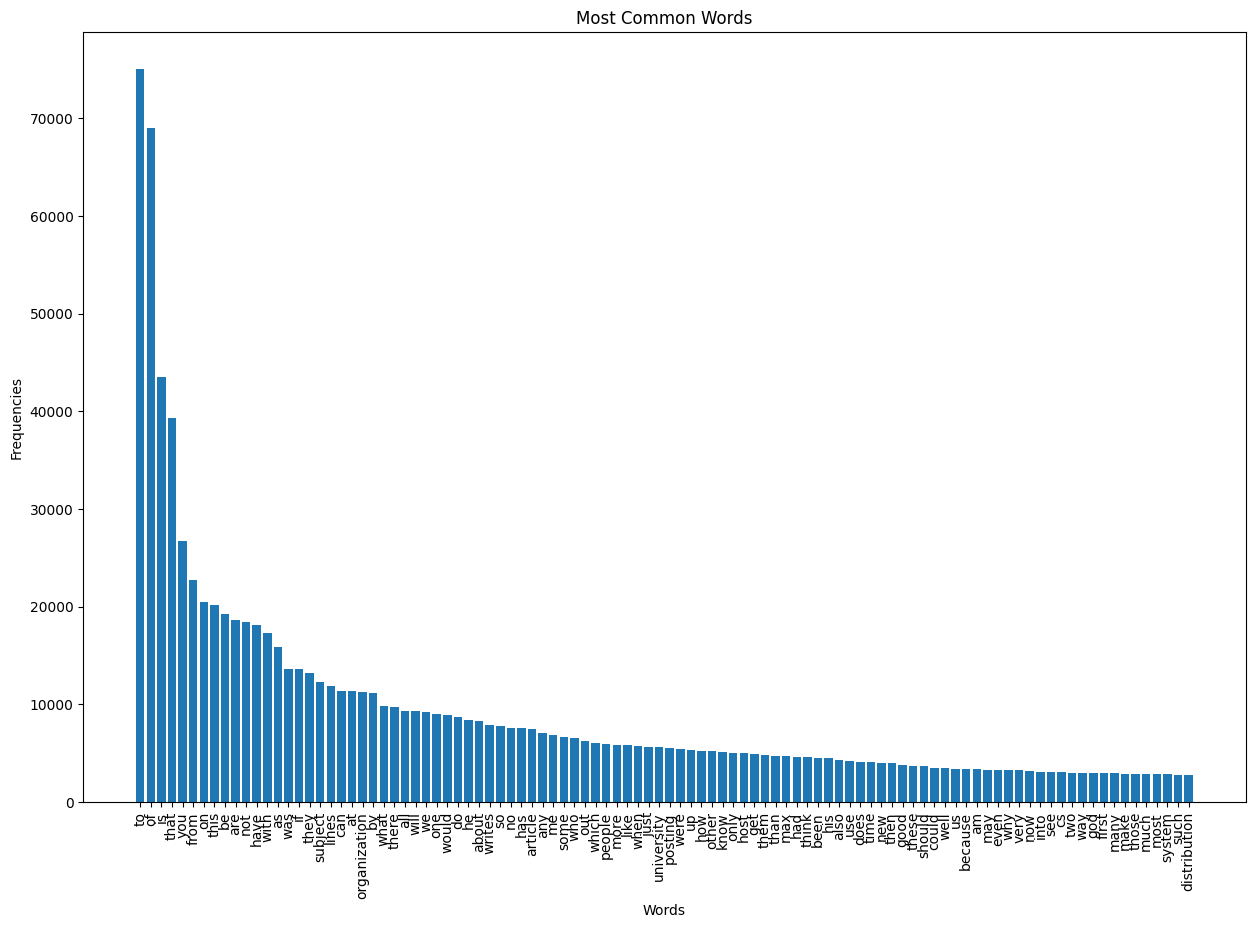

In [13]:
# Match the words to their frequencies from the 'common' list
x1, y1 = zip(*common)

# Create a bar plot
plt.figure(figsize=(15, 10))
plt.bar(x1, y1)

# Design the bar plot
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Most Common Words')
plt.xticks(rotation = 90)
plt.show()

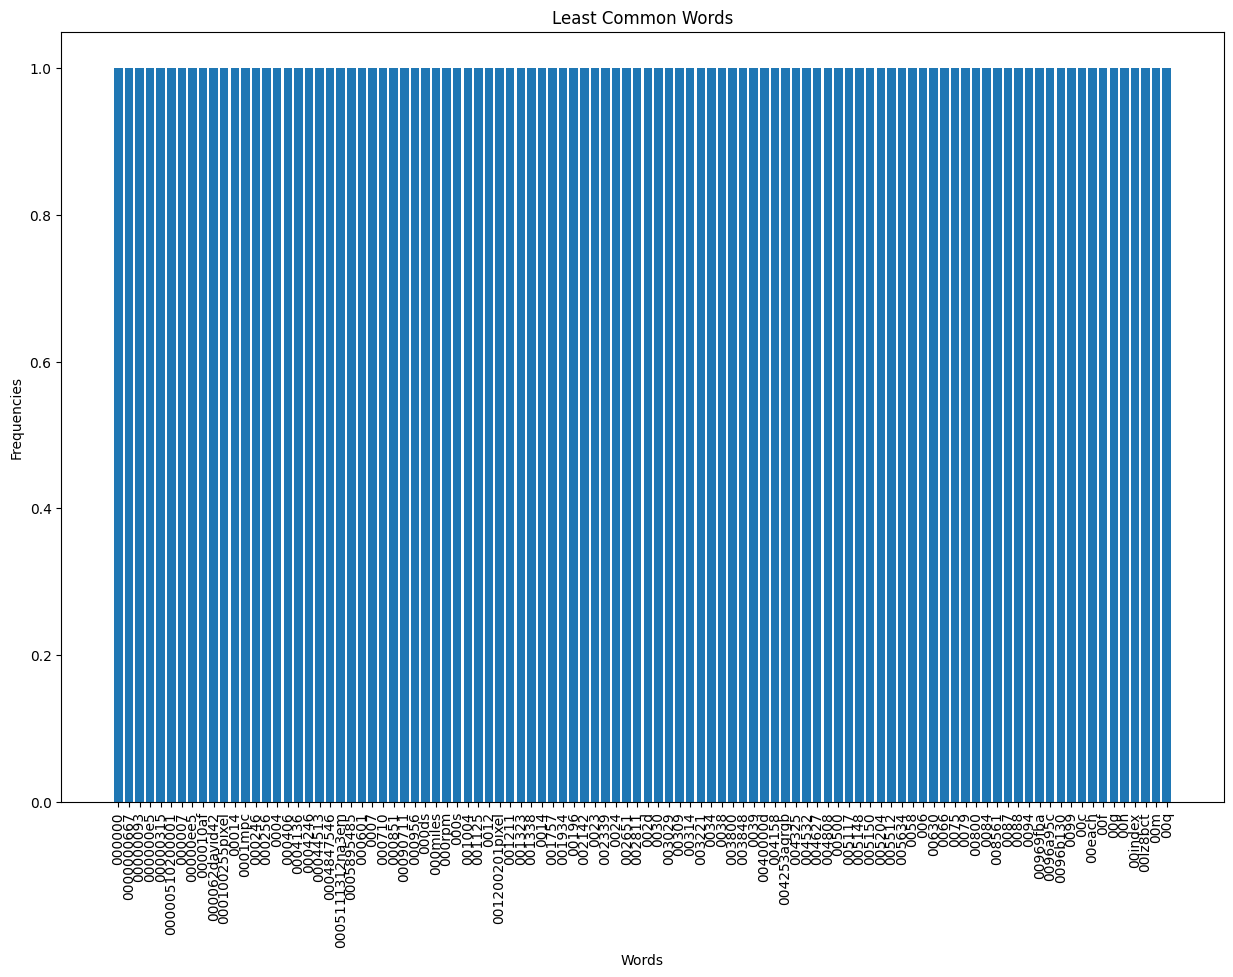

In [14]:
# Transform the 'uncommon' dictionary into a list
uncommon_list = list(uncommon.items())

# Match the words to their frequencies from the 'uncommon' list
x2, y2 = zip(*uncommon_list)

# Create a bar plot
plt.figure(figsize=(15, 10))
plt.bar(x2, y2)

# Design bar plot
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Least Common Words')
plt.xticks(rotation = 90)
plt.show()

# Text Classification with Bag of Words Model (4 Points)

In this task, you will use the vectors created from the text data to perform text classification.

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

Split the dataset into training and test set.

In [16]:
# Create a third CountVectorizer
vectorizer3 = CountVectorizer(stop_words = stop_words)

# Create the input features and target variables
X = vectorizer3.fit_transform(data)
y = newsgroups_data['target']

# Split the data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, random_state=0)

Train a simple classifier such as Naive Bayes or Logistic Regression on the training set.

In [17]:
# Initialize Multinomial Naive Bayes
mnb = MultinomialNB()

# Train the classifier on the train set
mnb.fit(Xtrain, ytrain)

MultinomialNB()

Evaluate the classifier on the test set using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [18]:
# Predict y-values from x- values in testing set
ypred = mnb.predict(Xtest)

# Evaluate the Classifier
report = classification_report(ytest, ypred, target_names=newsgroups_data['target_names'])
report

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.84      0.92      0.88       175\n           comp.graphics       0.84      0.67      0.75       234\n comp.os.ms-windows.misc       0.96      0.21      0.35       235\ncomp.sys.ibm.pc.hardware       0.52      0.85      0.65       239\n   comp.sys.mac.hardware       0.95      0.64      0.77       236\n          comp.windows.x       0.65      0.90      0.76       252\n            misc.forsale       0.91      0.63      0.74       224\n               rec.autos       0.87      0.80      0.84       244\n         rec.motorcycles       0.96      0.88      0.92       248\n      rec.sport.baseball       0.97      0.93      0.95       238\n        rec.sport.hockey       0.93      0.99      0.96       233\n               sci.crypt       0.75      0.97      0.85       240\n         sci.electronics       0.91      0.69      0.79       239\n                 sci.med       0.87      0.94      0.90    

Interpret the results. Note that the labels in the classification report, such as 'sci.electronics', 'talk.politics.misc', and 'rec.autos', are the names of the newsgroups from which the data in the 20 Newsgroups dataset was collected. The 'sci.', 'talk.', and 'rec.' prefixes are part of the newsgroup names and indicate the broader category of the newsgroup.

- First, we'll take a look at the accuracy of our classifier. The more correct predictions our classifier made, the higher the accuracy. As we can see, our classifier has an accuracy of 0.82, meaning that its predictions were mostly correct. 

- Looking at the precision of our classifier, which is determined by the number of retrieved true positives divided by all positive calls, it's overall pretty high. We have a highest precision of 0.97 for talk.religion.misc and rec.sport.baseball  and a lowest precision of 0.52 for comp.sys.ibm.pc.hardware. Overall, the precision is at an average of 0.85, which indicates that our classifier is really good. 

- The recall is the number of retrieved true positives divided by all the instances in the data set. The highest value is 0.99 for rec.sport.hockey and the lowest is comp.os.ms-windows.misc with a value of 0.21. The recall is a little bit more distributed over the highs and lows than precision,  which is also seen at a slightly lower average of 0.81. Regardless, this is still pretty good. 

- Lastly, the F1-Score is a harmonic mean between precision and recall and is therefore dependent on the previous values. The lowest F1-Score lies with comp.os.ms-windows.misc again at 0.35, while the highest value is 0.96 at rec.sport.baseball and rec.sport.hockey. 
Overall, we can see that our classifier performs in the 80s, which indicates a really good performance.